**SOCIAL RESEARCH: Final Project** 

**NAME:** Letizia

**SURNAME:** Lanza

**ID:** VR502321

**PART 1:** Data Exploration and Data Wrangling

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data. 

The dataset include data for the estimation of obesity levels in individuals with ages between 14 and 61 from the countries of Mexico, Perù and Colombia, based on their diverse eating habits and physical condition. The data were collected by Fabio Mendoza Palechor and Alexis de la Hoz Manotas (Universidad de la Costa, CUC, Colombia). The 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, the other 23% of the data was collected directly from users through a web platform. The survey was anonymous and then the information were processed. 

The first thing to succesfully carry out some interesting exercises, is to import some libraries such as:

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

The aim of the following command is being able to read data from a CSV file and load it into a Pandas DataFrame.

In [2]:
obesity_df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


As it can be seen the dataset has 2111 rows and 17 columns.

It is also important to explain what the 17 columns refer to: 

- **Age:** feature, continuous, "age" --> numeric value

- **Gender:** feature, categorical, "gender" --> female / male 

- **Height:** feature, continuous --> numeric value in meters 

- **Weight:** feature, continuous --> numeric value in kilograms

- **CALC:** feature, categorical, "how often do you drink alcohol?" --> no / sometimes / frequently / always

- **FAVC:** feature, binary, "do you eat high caloric food frequently?" --> yes / no 

- **FCVC:** feature, integer, "do you usually eat vegetables in your meals?" --> never / sometimes / always  

- **NCP:** feature, continuous, "how many meals do you have daily?" --> between 1 and 2 / 3 / more than 3 

- **SCC:** feature, binary, "do you monitor the calories you eat daily?" --> yes / no 

- **SMOKE:** feature, binary, "do you smoke?" --> yes / no 

- **CH2O:** feature, continuous, "how much water do you drink daily?" --> less than a liter / between 1 and 2 L / more than 2 L 

- **family_history_with_overweight:** feature, binary, "has a family member suffered or suffers from overweight?" --> yes / no 

- **FAF:** feature, continuous, "how often do you have physical activity?" --> I do not have / 1 or 2 days / 2 or 4 days / 4 or 5 days 

- **TUE:** feature, integer, "how much time do you use technological devices such as cell phone, videogames, television, computer and others?" --> 0 - 2 hours / 3 - 5 hours / more than 5 hours 

- **CAEC:** feature, categorical, "do you eat any food between meals?" --> no / sometimes / frequently / always 

- **MTRANS:** feature, categorical, "which transportation do you usually use?" --> automobile / motorbike / bike / public transportation / walking 

- **NObeyesdad:** target, categorical, "obesity level" --> mass body index = weight / height * height compared with the data provided by the World Health Organization (WHO) and the Mexican Normativity where 
    - underweight less than 18.5
    - normal 18.5 to 24.9
    - overweight 25.0 to 29.0
    - obesity I 30.0 to 34.9
    - obesity II 35.0 to 39.9
    - obesity III higher than 40

More specifically, *"features"*, in a Social Research environment, are attributes or variables that are considered and analyzed to better understand social phenomena, relationships, and human behavior. Also, when a variable is *"continuous"* it means that it is a characteristic or attribute that can take on an infinite number of values within a specified range. These variables are measurable on a continuous scale and are not restricted to discrete or categorical values. In fact, when features are *"categorical"*, it signifies that they correspond variables that take discrete values and can be organized into distinct categories or levels rather than on a continuous scale. These categories can be represented by labels or nominal values that do not imply intrinsic ordering. Again, when features are *"binary"*, it indicates that they exemplify variables that take only two distinct values or categories. These two categories can be delineated by labels such as "0" and "1," "yes" and "no," "present" and "absent," "male" and "female," "success" and "failure," and so on. Finally, when features are of type *"integer"* it denotes that they represent numeric variables that take only integer values, that is, numbers without fractions or decimals. These variables are typically measurable on an integer scale and cannot take non - integer values.

The purpose of the following codeds is to round to one decimal place those values that have multilple decimal places. This is done for columns such as "Age", "Height", "Weight", "CH2O", "FAF" and "TUE". 

In [3]:
obesity_df['Age'] = obesity_df['Age'].round(1)
obesity_df['Height'] = obesity_df['Height'].round(1)
obesity_df['Weight'] = obesity_df['Weight'].round(1)
obesity_df['CH2O'] = obesity_df['CH2O'].round(1)
obesity_df['FAF'] = obesity_df['FAF'].round(1)
obesity_df['TUE'] = obesity_df['TUE'].round(1)
obesity_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.6,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.8,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.8,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.8,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.7,yes,1.7,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.3,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.1,yes,1.4,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.1,0.6,Sometimes,Public_Transportation,Obesity_Type_III


The *DataFrame.info()* function prints information about the DataFrame such as number of columns, column labels, column data types, memory usage, range index and the number of cells in each column (non-null values):

In [4]:
obesity_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In particular, in this case it was necessary to add the *verbose = True* and the *show_counts = True* functions to get a broader and more detailed overview of the dataset. Moreover, the *verbose = True* function stands for controlling the verbosity of the output and when it is set to 'True', it provides some additional information like column names and data types. The *show_count = True* function, also, shows the number of non-null values for each column alongside the total row count.

Hence, as it can be seen there are 17 columns with a Rangeindex (rows) of 2111 (as seen before). Moreover, the Non-Null Count column returns the number of non-null values in the relative column of the DataFrame, as said before. There are also two types of data types such as object (generic data) and float (real numbers that can have a fractional part). Another information that can be read is the memory usage of 280.5+ KB.

The *DataFrame.describe()* function gives descriptive information about the dataset as it can be seen below:

In [5]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.31279,1.701232,86.585978,2.419043,2.685628,2.007816,1.010279,0.658077
std,6.34572,0.099470,26.191165,0.533927,0.778039,0.614717,0.851329,0.609296
min,14.00000,1.400000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.90000,1.600000,65.450000,2.000000,2.658738,1.600000,0.100000,0.000000
50%,22.80000,1.700000,83.000000,2.385502,3.000000,2.000000,1.000000,0.600000
75%,26.00000,1.800000,107.450000,3.000000,3.000000,2.500000,1.700000,1.000000
max,61.00000,2.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Glossary:

- count: the number of non-null values in each column

- mean: the mean (average) value of each numerical column

- sdt: the standard deviation of each numerical column

- min: the minimum value in each numerical column

- 25%: the value at the 25th percentile (first quartile) of each numerical column

- 50%: the value at the 50th percentile (median or second quartile) of each numerical column

- 75%: the value at the 75th percentile (third quartile) of each numerical column

- max: the maximum value in each numerical column

The *DataFrame.describe().T* function is used to transpose index and columns of the data frame as follow:

In [6]:
obesity_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312790,6.345720,14.0,19.900000,22.800000,26.00,61.0
Height,2111.0,1.701232,0.099470,1.4,1.600000,1.700000,1.80,2.0
Weight,2111.0,86.585978,26.191165,39.0,65.450000,83.000000,107.45,173.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.00,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.00,4.0
CH2O,2111.0,2.007816,0.614717,1.0,1.600000,2.000000,2.50,3.0
FAF,2111.0,1.010279,0.851329,0.0,0.100000,1.000000,1.70,3.0
TUE,2111.0,0.658077,0.609296,0.0,0.000000,0.600000,1.00,2.0


The *DataFrame.head()* function displays the first 5 rows of the DataFrame by default as below:

In [7]:
obesity_df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.6,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.8,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.8,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.8,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The *DataFrame.tail()* function returns the last 5 rows of the dataframe by default as can be seen:

In [8]:
obesity_df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.7,yes,1.7,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.3,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.1,yes,1.4,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.1,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.7,Female,1.7,133.5,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.0,0.7,Sometimes,Public_Transportation,Obesity_Type_III


The *DataFrame.columns* function is an attribute that provides access to the column labels of a DataFrame:

In [9]:
obesity_df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

The *DataFrame.max()* function is used to find the maximum value in the DataFrame:

In [10]:
obesity_df.max()

Age                                              61.0
Gender                                           Male
Height                                            2.0
Weight                                          173.0
CALC                                               no
FAVC                                              yes
FCVC                                              3.0
NCP                                               4.0
SCC                                               yes
SMOKE                                             yes
CH2O                                              3.0
family_history_with_overweight                    yes
FAF                                               3.0
TUE                                               2.0
CAEC                                               no
MTRANS                                        Walking
NObeyesdad                        Overweight_Level_II
dtype: object

The *DataFrame.min()* function is used to find the minimum value in the DataFrame:

In [11]:
obesity_df.min()

Age                                              14.0
Gender                                         Female
Height                                            1.4
Weight                                           39.0
CALC                                           Always
FAVC                                               no
FCVC                                              1.0
NCP                                               1.0
SCC                                                no
SMOKE                                              no
CH2O                                              1.0
family_history_with_overweight                     no
FAF                                               0.0
TUE                                               0.0
CAEC                                           Always
MTRANS                                     Automobile
NObeyesdad                        Insufficient_Weight
dtype: object

For checking if there are some null values the *DataFrame.isnull()* function can be used:

In [12]:
obesity_df.isnull()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Another way to identify how many null values there are in the dataframe is:

In [13]:
obesity_df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

As evident from the codes above there is no null value. This could be given by: 
- *Data quality:* the data were collected accurately and completely, with no omissions or missing information. This suggests that the dataset is reliable and ready to be used for analysis without having to deal with missing data issues
- *Data pre-processing:* data pre-processing operations were performed to handle any missing values prior to analysis. These operations may include removing rows or columns with missing values, imputing missing values with estimates based on other data, or using more advanced techniques to deal with missing data
- *Data collection methods:* could reflect the effectiveness of the data collection methods used in the survey or social survey. If participants answered all questions without leaving any blanks, this could indicate a good understanding of the instructions by the participants or a research design that minimized the possibility of missing values

Now let's start with visualizing the data from the dataset using some plots, recalling the same libraries as at the beginning.

In [14]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

A valid possibility in the analysis of this dataset, is to conduct an initial gender differentiation (female vs male) and then evaluate the other features (columns) in relation to that. In fact, the code down here, filters the 'Gender' column by 'Female' and 'Male' output and then a pie chart is done. 

Number of females who responded: 1043
Number of males who responded: 1068


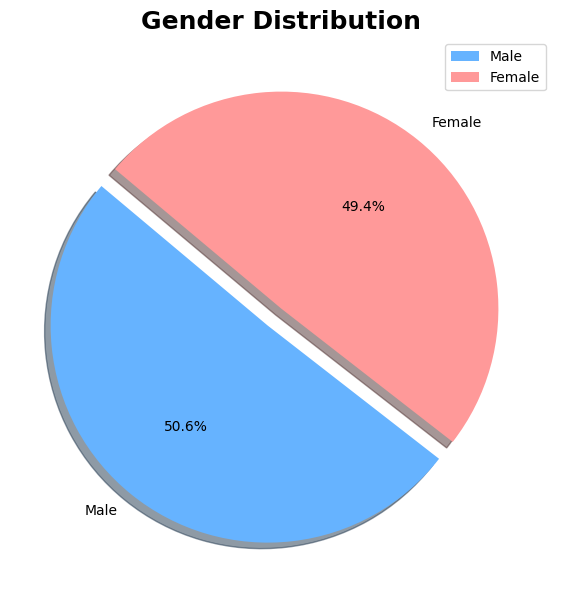

In [15]:
gender_type = obesity_df['Gender'].value_counts()
print('Number of females who responded:', gender_type['Female'])
print('Number of males who responded:', gender_type['Male'])

plt.figure(figsize = (8, 6))
plt.pie(gender_type, labels = gender_type.index, colors = ('#66b3ff', '#ff9999'), autopct = '%1.1f%%', explode = (0.1, 0), startangle = 140, shadow = True)
plt.title('Gender Distribution', fontsize = 18, fontweight = 'bold', color = 'black')
plt.gca().set_aspect('equal')
plt.legend()
plt.subplots_adjust(left = 0.1, right = 0.7)
plt.tight_layout()
plt.show()

As can be appreciated, the sample of people analyzed is nearly homogeneous in that the number of females deviates by only 25 fewer individuals than the males who partecipated in the survey. 

Using the code below, the aim is to filter the dataset *obesity_df* to get information specifically about 'Female' in the 'Gender' coulmn and then it is calculated the mean age, the maximum age and the minimum age. After having done so, a line graph is depicted. 

Mean age of the female gender: 24.0
Max age of the female gender: 61.0
Min age of the female gender: 15.0


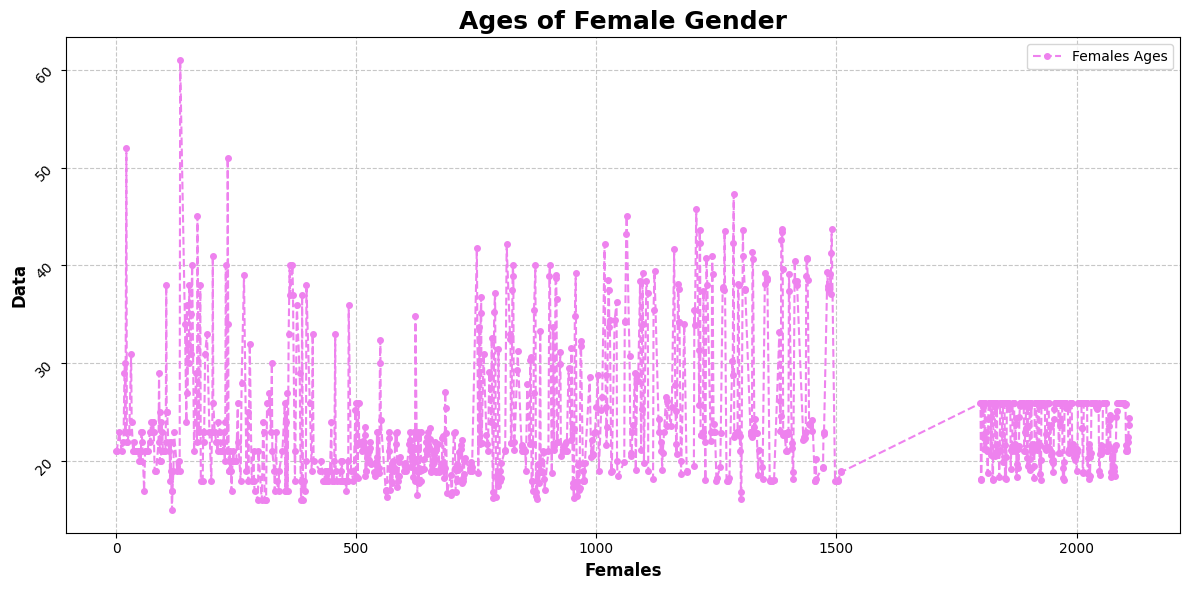

In [16]:
female_df = obesity_df[obesity_df['Gender'] == 'Female']
female_ages = female_df['Age']
mean_female_ages = female_ages.mean().round(0)
max_female_ages = female_ages.max().round(0)
min_female_ages = female_ages.min().round(0)
print('Mean age of the female gender:', mean_female_ages)
print('Max age of the female gender:', max_female_ages)
print('Min age of the female gender:', min_female_ages)

plt.figure(figsize = (12,6))
plt.plot(female_ages, color = 'violet', linestyle = '--', marker = 'o', markersize = 4, label = 'Females Ages')
plt.title('Ages of Female Gender', fontweight = 'bold', fontsize = 18, color = 'black')
plt.ylabel('Data', fontweight = 'bold', color = 'black', fontsize = 12)
plt.xlabel('Females', fontweight = 'bold', color = 'black', fontsize = 12)
plt.yticks(fontsize = 10, rotation = 45)
plt.xticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()

Also here as above, the purpose of the code is to filter the dataset *obesity_df* to get information specifically about 'Male' in the 'Gender' coulmn and then it is calculated the mean age, the maximum age and the minimum age. After having done so, a line graph is depicted. 

Mean age of the male gender: 25.0
Max age of the male gender: 56.0
Min age of the male gender: 14.0


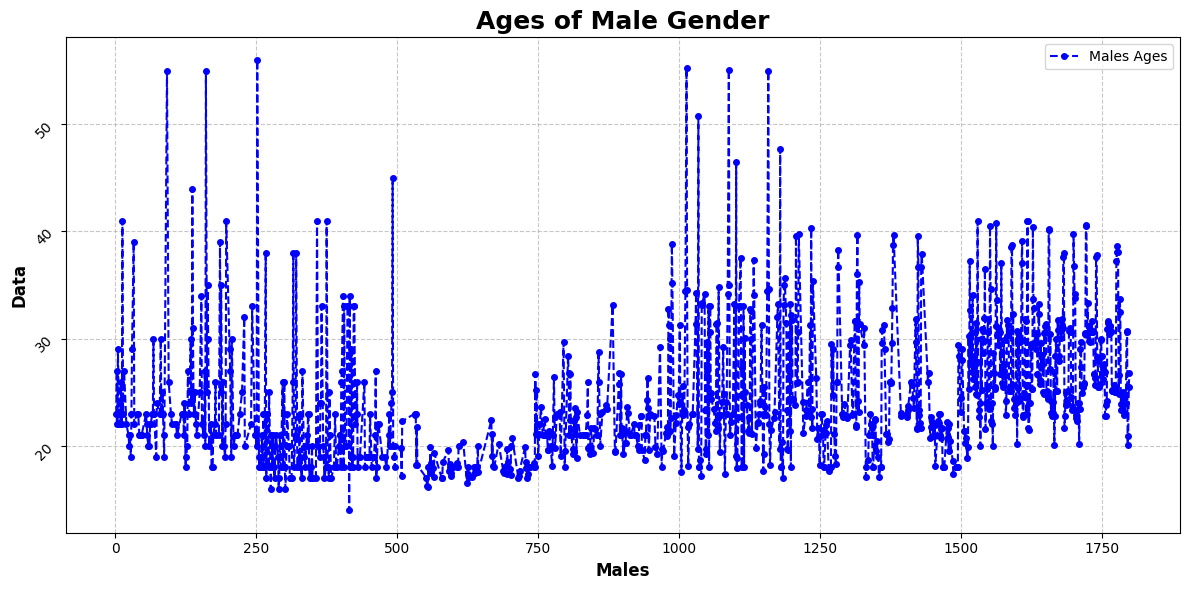

In [17]:
male_df = obesity_df[obesity_df['Gender'] == 'Male']
male_ages = male_df['Age']
mean_male_ages = male_ages.mean().round(0)
max_male_ages = male_ages.max().round(0)
min_male_ages = male_ages.min().round(0)
print('Mean age of the male gender:', mean_male_ages)
print('Max age of the male gender:', max_male_ages)
print('Min age of the male gender:', min_male_ages)

plt.figure(figsize = (12,6))
plt.plot(male_ages, color = 'blue', linestyle = '--', marker = 'o', markersize = 4, label = 'Males Ages')
plt.title('Ages of Male Gender', fontweight = 'bold', fontsize = 18, color = 'black')
plt.ylabel('Data', fontweight = 'bold', color = 'black', fontsize = 12)
plt.xlabel('Males', fontweight = 'bold', color = 'black', fontsize = 12)
plt.yticks(fontsize = 10, rotation = 45)
plt.xticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()

Here below, the 3 most 'negative' features are studied.

The scheme of the following codes takes into account the 'CALC' column ('how often do you drink alcohol?') and firstly is filtered the output differentiating 'no / sometimes / frequently / always', and then is calculated how many females or males for each output.

In [18]:
not_drink = obesity_df[obesity_df['CALC'] == 'no']['CALC'].count()
print('Number of people who do not drink alcohol:', not_drink)

females_not_drink = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['CALC'] == 'no')]['CALC'].count()
print('Number of females who do not drink alcohol:', females_not_drink)

males_not_drink = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['CALC'] == 'no')]['CALC'].count()
print('Number of males who do not drink alcohol:', males_not_drink)

Number of people who do not drink alcohol: 639
Number of females who do not drink alcohol: 304
Number of males who do not drink alcohol: 335


In [19]:
sometimes_drink = obesity_df[obesity_df['CALC'] == 'Sometimes']['CALC'].count()
print('Number of people who sometimes drink alcohol:', sometimes_drink)

females_sometimes_drink = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['CALC'] == 'Sometimes')]['CALC'].count()
print('Number of females who sometimes drink alcohol:', females_sometimes_drink)

males_sometimes_drink = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['CALC'] == 'Sometimes')]['CALC'].count()
print('Number of males who sometimes drink alcohol:', males_sometimes_drink)

Number of people who sometimes drink alcohol: 1401
Number of females who sometimes drink alcohol: 711
Number of males who sometimes drink alcohol: 690


In [20]:
frequently_drink = obesity_df[obesity_df['CALC'] == 'Frequently']['CALC'].count()
print('Number of people who frequently drink alcohol:', frequently_drink)

females_frequently_drink = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['CALC'] == 'Frequently')]['CALC'].count()
print('Number of females who frequently drink alcohol:', females_frequently_drink)

males_frequently_drink = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['CALC'] == 'Frequently')]['CALC'].count()
print('Number of males who frequently drink alcohol:', males_frequently_drink)

Number of people who frequently drink alcohol: 70
Number of females who frequently drink alcohol: 28
Number of males who frequently drink alcohol: 42


In [21]:
always_drink = obesity_df[obesity_df['CALC'] == 'Always']['CALC'].count()
print('Number of people who always drink alcohol:', always_drink)

females_always_drink = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['CALC'] == 'Always')]['CALC'].count()
print('Number of females who always drink alcohol:', females_always_drink)

males_always_drink = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['CALC'] == 'Always')]['CALC'].count()
print('Number of males who always drink alcohol:', males_always_drink)


Number of people who always drink alcohol: 1
Number of females who always drink alcohol: 0
Number of males who always drink alcohol: 1


To visualize the codes above, 4 subplots using the bar chart style are done.

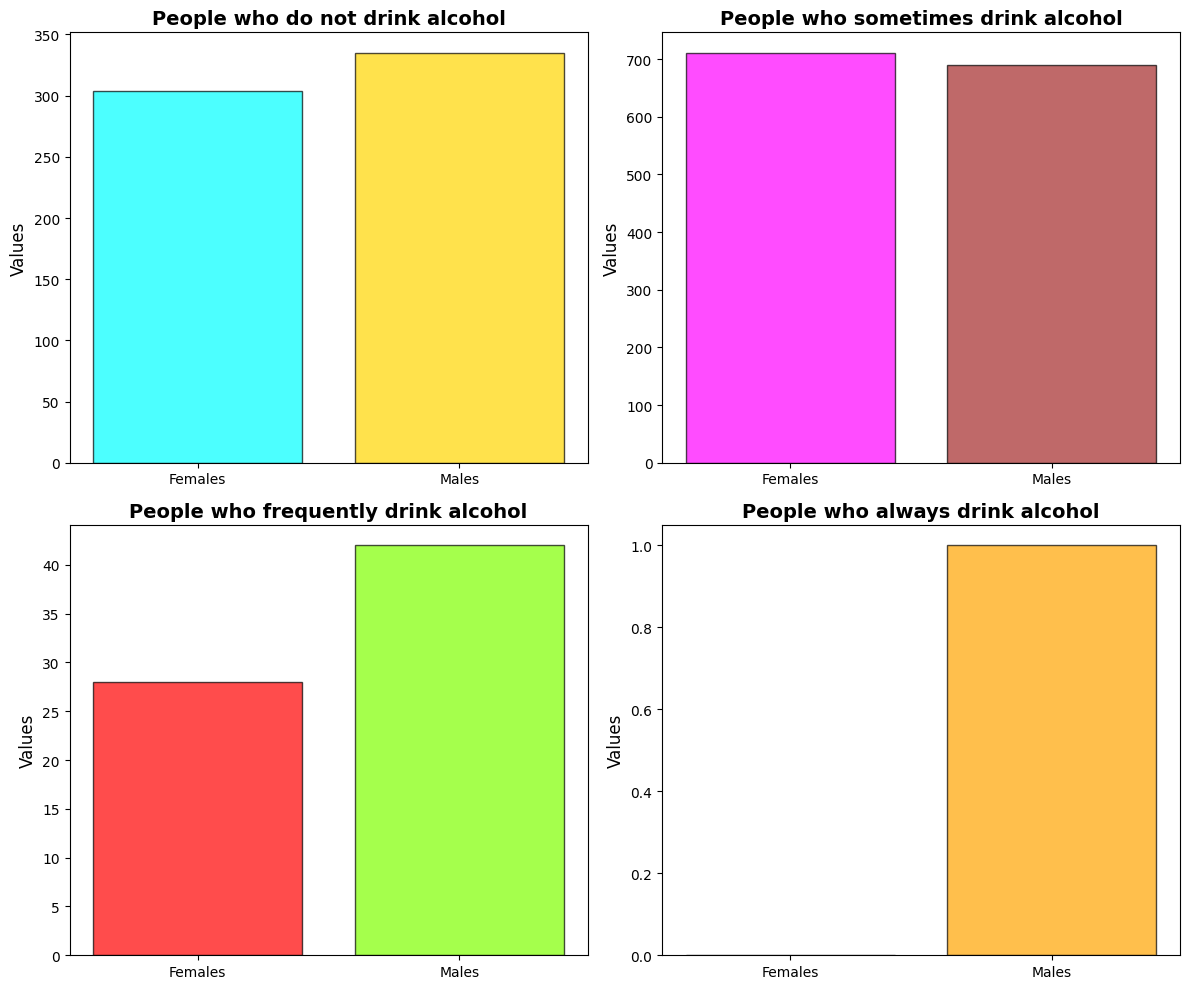

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (12, 10))

axs[0, 0].bar(x = (0, 1), height = (females_not_drink.tolist(), males_not_drink.tolist()), color = ('cyan', 'gold'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0, 0].set_title('People who do not drink alcohol', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0, 0].set_ylabel('Values', fontsize = 12)

axs[0, 1].bar(x = (0, 1), height = (females_sometimes_drink.tolist(), males_sometimes_drink.tolist()), color = ('magenta', 'brown'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0, 1].set_title('People who sometimes drink alcohol', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0, 1].set_ylabel('Values', fontsize = 12)

axs[1, 0].bar(x = (0, 1), height = (females_frequently_drink.tolist(), males_frequently_drink.tolist()), color = ('red', 'chartreuse'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1, 0].set_title('People who frequently drink alcohol', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1, 0].set_ylabel('Values', fontsize = 12)

axs[1, 1].bar(x = (0, 1), height = (females_always_drink.tolist(), males_always_drink.tolist()), color = ('purple', 'orange'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1, 1].set_title('People who always drink alcohol', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1, 1].set_ylabel('Values', fontsize = 12)

plt.tight_layout()
plt.show()


From these 4 subplots it can be said that the male gender (tot. 1.068) consumes more alcohol than the female gender (tot. 1.043). This can lead to higher levels of obesity because alcohol intake, among other things, has a negative effect on the metabolism in that it increases appetite by inhibiting the neurotransmitters respobible for satiety and in addition, alcohol itself contains about twice as many calories as carbohydrates or proteins.

To visualize the code below, 2 subplots using the horizontal bar chart style are done. 

In [23]:
yes_caloric_food = obesity_df[obesity_df['FAVC'] == 'yes']['FAVC'].count()
print('Number of people who eat high caloric food:', yes_caloric_food)

females_yes_caloric_food = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['FAVC'] == 'yes')]['FAVC'].count()
print('Number of females who eat high caloric food:', females_yes_caloric_food)

males_yes_caloric_food = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['FAVC'] == 'yes')]['FAVC'].count()
print('Number of males who eat high caloric food:', males_yes_caloric_food)

Number of people who eat high caloric food: 1866
Number of females who eat high caloric food: 900
Number of males who eat high caloric food: 966


In [24]:
no_caloric_food = obesity_df[obesity_df['FAVC'] == 'no']['FAVC'].count()
print('Number of people who do not eat high caloric food:', no_caloric_food)

females_no_caloric_food = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['FAVC'] == 'no')]['FAVC'].count()
print('Number of females who do not eat high caloric food:', females_no_caloric_food)

males_no_caloric_food = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['FAVC'] == 'no')]['FAVC'].count()
print('Number of males who do not eat high caloric food:', males_no_caloric_food)

Number of people who do not eat high caloric food: 245
Number of females who do not eat high caloric food: 143
Number of males who do not eat high caloric food: 102


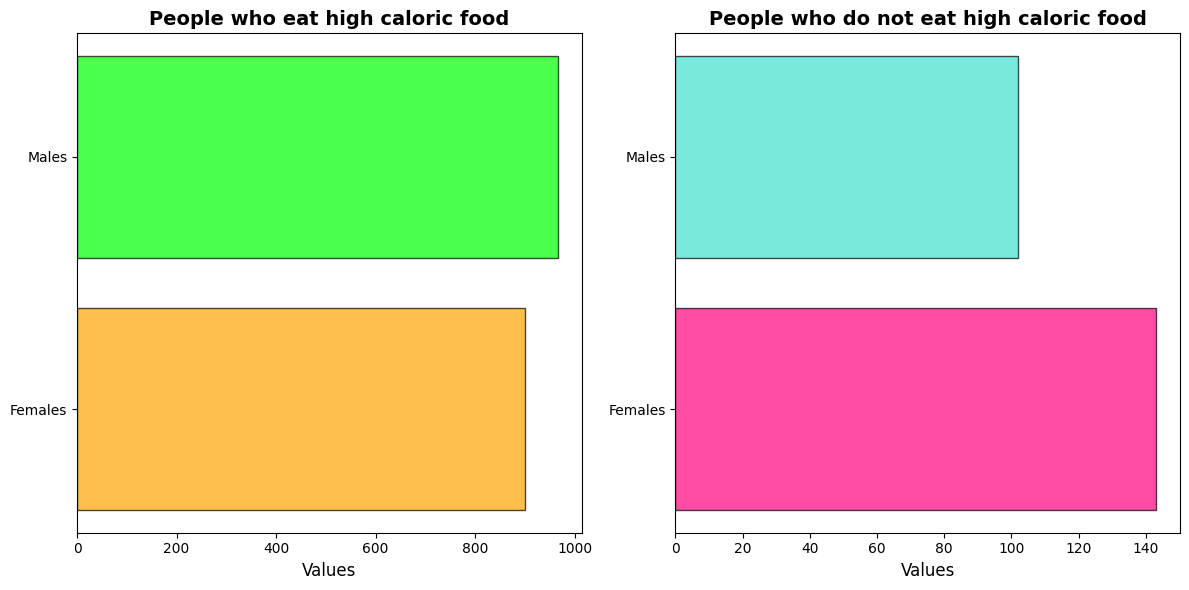

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].barh(y = (0, 1), width = (females_yes_caloric_food.tolist(), males_yes_caloric_food.tolist()), color = ('#FFA500', '#00FF00'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0].set_title('People who eat high caloric food', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0].set_xlabel('Values', fontsize = 12)

axs[1].barh(y = (0, 1), width = (females_no_caloric_food.tolist(), males_no_caloric_food.tolist()), color = ('#FF007F', '#40E0D0'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1].set_title('People who do not eat high caloric food', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1].set_xlabel('Values', fontsize = 12)

plt.tight_layout()
plt.show()

Here, too, the male gender, albeit only for 66 respondents, stands out in favour of high caloric food. The female/male discrepancy is most noticeable at the label "people who do not eat high caloric food", where the female gender outnumbers the male gender by 41 individuals. 

To visualize the code below, 2 subplots using the pie chart style are done.

In [26]:
yes_smoke = obesity_df[obesity_df['SMOKE'] == 'yes']['SMOKE'].count()
print('Number of people who smoke:', yes_smoke)

females_yes_smoke = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['SMOKE'] == 'yes')]['SMOKE'].count()
print('Number of females who smoke:', females_yes_smoke)

males_yes_smoke = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['SMOKE'] == 'yes')]['SMOKE'].count()
print('Number of males who smoke:', males_yes_smoke)

Number of people who smoke: 44
Number of females who smoke: 15
Number of males who smoke: 29


In [27]:
no_smoke = obesity_df[obesity_df['SMOKE'] == 'no']['SMOKE'].count()
print('Number of people who do not smoke:', no_smoke)

females_no_smoke = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['SMOKE'] == 'no')]['SMOKE'].count()
print('Number of females who do not smoke:', females_no_smoke)

males_no_smoke = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['SMOKE'] == 'no')]['SMOKE'].count()
print('Number of males who do not smoke:', males_no_smoke)

Number of people who do not smoke: 2067
Number of females who do not smoke: 1028
Number of males who do not smoke: 1039


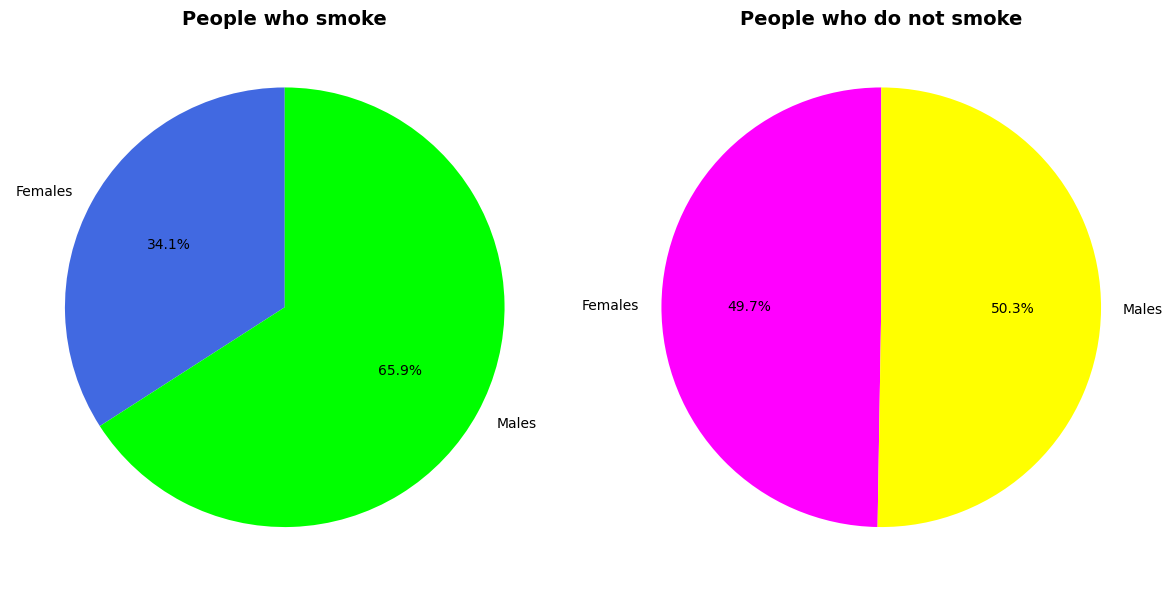

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

axs[0].pie((females_yes_smoke.sum(), males_yes_smoke.sum()), labels = ('Females', 'Males'), colors = ('#4169E1', '#00FF00'), autopct = '%1.1f%%', startangle = 90)
axs[0].set_title('People who smoke', fontsize = 14, fontweight = 'bold', color = 'black')

axs[1].pie((females_no_smoke.sum(), males_no_smoke.sum()), labels = ('Females', 'Males'), colors = ('#FF00FF', '#FFFF00'), autopct = '%1.1f%%', startangle = 90)
axs[1].set_title('People who do not smoke', fontsize = 14, fontweight = 'bold', color = 'black')

plt.tight_layout()
plt.show()

Once again, the male gender stands out for "bad habits" in that out of a total of 44 respondents who said "yes" to "do you smoke?", 65.9% are male and only 34.1% are female. Whereas, the number of female and male who do not smoke is almost uniform. 

Drowing the lines from these graphs representing the major "bad habits" among those take into consideration, it can be seen that the female gender tended to have better habits than the male gender. 

Now, it will be taken into account some other features. 

In this specific case, the output 'never' is depicted with the value '1.0', the output 'sometimes' is denoted by '2.0' and the output always is represented by the value '3.0'.

In [29]:
never_vegetables = obesity_df[obesity_df['FCVC'] == 1.0]['FCVC'].count()
print('Number of people who never eat vegetables:', never_vegetables)

females_never_vegetables = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['FCVC'] == 1.0)]['FCVC'].count()
print('Number of females who never eat vegetables:', females_never_vegetables)

males_never_vegetables = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['FCVC'] == 1.0)]['FCVC'].count()
print('Number of males who never eat vegetables:', males_never_vegetables)

Number of people who never eat vegetables: 33
Number of females who never eat vegetables: 18
Number of males who never eat vegetables: 15


In [30]:
sometimes_vegetables = obesity_df[obesity_df['FCVC'] == 2.0]['FCVC'].count()
print('Number of people who sometimes eat vegetables:', sometimes_vegetables)

females_sometimes_vegetables = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['FCVC'] == 2.0)]['FCVC'].count()
print('Number of females who sometimes eat vegetables:', females_sometimes_vegetables)

males_sometimes_vegetables = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['FCVC'] == 2.0)]['FCVC'].count()
print('Number of males who sometimes eat vegetables:', males_sometimes_vegetables)

Number of people who sometimes eat vegetables: 600
Number of females who sometimes eat vegetables: 199
Number of males who sometimes eat vegetables: 401


In [31]:
always_vegetables = obesity_df[obesity_df['FCVC'] == 3.0]['FCVC'].count()
print('Number of people who always eat vegetables:', always_vegetables)

females_always_vegetables = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['FCVC'] == 3.0)]['FCVC'].count()
print('Number of females who always eat vegetables:', females_always_vegetables)

males_always_vegetables = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['FCVC'] == 3.0)]['FCVC'].count()
print('Number of males who always eat vegetables:', males_always_vegetables)

Number of people who always eat vegetables: 652
Number of females who always eat vegetables: 507
Number of males who always eat vegetables: 145


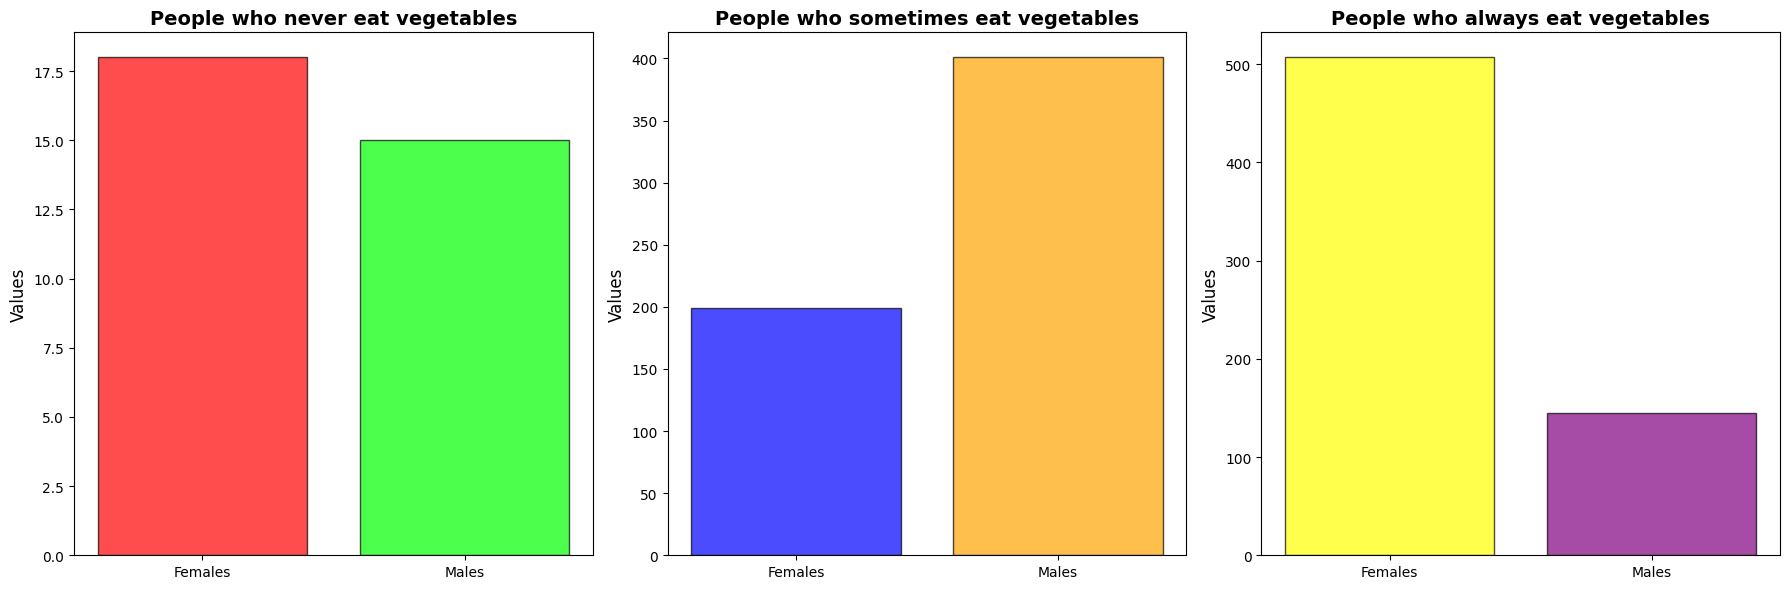

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(x = (0, 1), height = (females_never_vegetables, males_never_vegetables), color = ('#FF0000', '#00FF00'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0].set_title('People who never eat vegetables', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0].set_ylabel('Values', fontsize = 12)

axs[1].bar(x = (0, 1), height = (females_sometimes_vegetables, males_sometimes_vegetables), color = ('#0000FF', '#FFA500'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1].set_title('People who sometimes eat vegetables', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1].set_ylabel('Values', fontsize = 12)

axs[2].bar(x = (0, 1), height = (females_always_vegetables, males_always_vegetables), color = ('#FFFF00', '#800080'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[2].set_title('People who always eat vegetables', fontsize = 14, fontweight = 'bold', color = 'black')
axs[2].set_ylabel('Values', fontsize = 12)

plt.tight_layout()
plt.show()

In [33]:
automobile = obesity_df[obesity_df['MTRANS'] == 'Automobile']['MTRANS'].count()
print('Number of people who use the automobile as a mean of transport:', automobile)

females_automobile = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['MTRANS'] == 'Automobile')]['MTRANS'].count()
print('Number of females who use the automobile as a mean of transport:', females_automobile)

males_automobile = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['MTRANS'] == 'Automobile')]['MTRANS'].count()
print('Number of males who use the automobile as a mean of transport:', males_automobile)

Number of people who use the automobile as a mean of transport: 457
Number of females who use the automobile as a mean of transport: 166
Number of males who use the automobile as a mean of transport: 291


In [34]:
motorbike = obesity_df[obesity_df['MTRANS'] == 'Motorbike']['MTRANS'].count()
print('Number of people who use the motorbike as a mean of transport:', motorbike)

females_motorbike = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['MTRANS'] == 'Motorbike')]['MTRANS'].count()
print('Number of females who use the motorbike as a mean of transport:', females_motorbike)

males_motorbike = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['MTRANS'] == 'Motorbike')]['MTRANS'].count()
print('Number of males who use the motorbike as a mean of transport:', males_motorbike)

Number of people who use the motorbike as a mean of transport: 11
Number of females who use the motorbike as a mean of transport: 2
Number of males who use the motorbike as a mean of transport: 9


In [35]:
bike = obesity_df[obesity_df['MTRANS'] == 'Bike']['MTRANS'].count()
print('Number of people who use the bike as a mean of transport:', bike)

females_bike = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['MTRANS'] == 'Bike')]['MTRANS'].count()
print('Number of females who use the bike as a mean of transport:', females_bike)

males_bike = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['MTRANS'] == 'Bike')]['MTRANS'].count()
print('Number of males who use the bike as a mean of transport:', males_bike)

Number of people who use the bike as a mean of transport: 7
Number of females who use the bike as a mean of transport: 0
Number of males who use the bike as a mean of transport: 7


In [36]:
public_transportation = obesity_df[obesity_df['MTRANS'] == 'Public_Transportation']['MTRANS'].count()
print('Number of people who use the public transportation as a mean of transport:', public_transportation)

females_public_transportation = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['MTRANS'] == 'Public_Transportation')]['MTRANS'].count()
print('Number of females who use the public transportation as a mean of transport:', females_public_transportation)

males_public_transportation = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['MTRANS'] == 'Public_Transportation')]['MTRANS'].count()
print('Number of males who use the public transportation as a mean of transport:', males_public_transportation)

Number of people who use the public transportation as a mean of transport: 1580
Number of females who use the public transportation as a mean of transport: 854
Number of males who use the public transportation as a mean of transport: 726


In [37]:
walking = obesity_df[obesity_df['MTRANS'] == 'Walking']['MTRANS'].count()
print('Number of people who go by foot:', walking)

females_walking = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['MTRANS'] == 'Walking')]['MTRANS'].count()
print('Number of females who go by foot:', females_walking)

males_walking = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['MTRANS'] == 'Walking')]['MTRANS'].count()
print('Number of males who go by foot:', males_walking)

Number of people who go by foot: 56
Number of females who go by foot: 21
Number of males who go by foot: 35


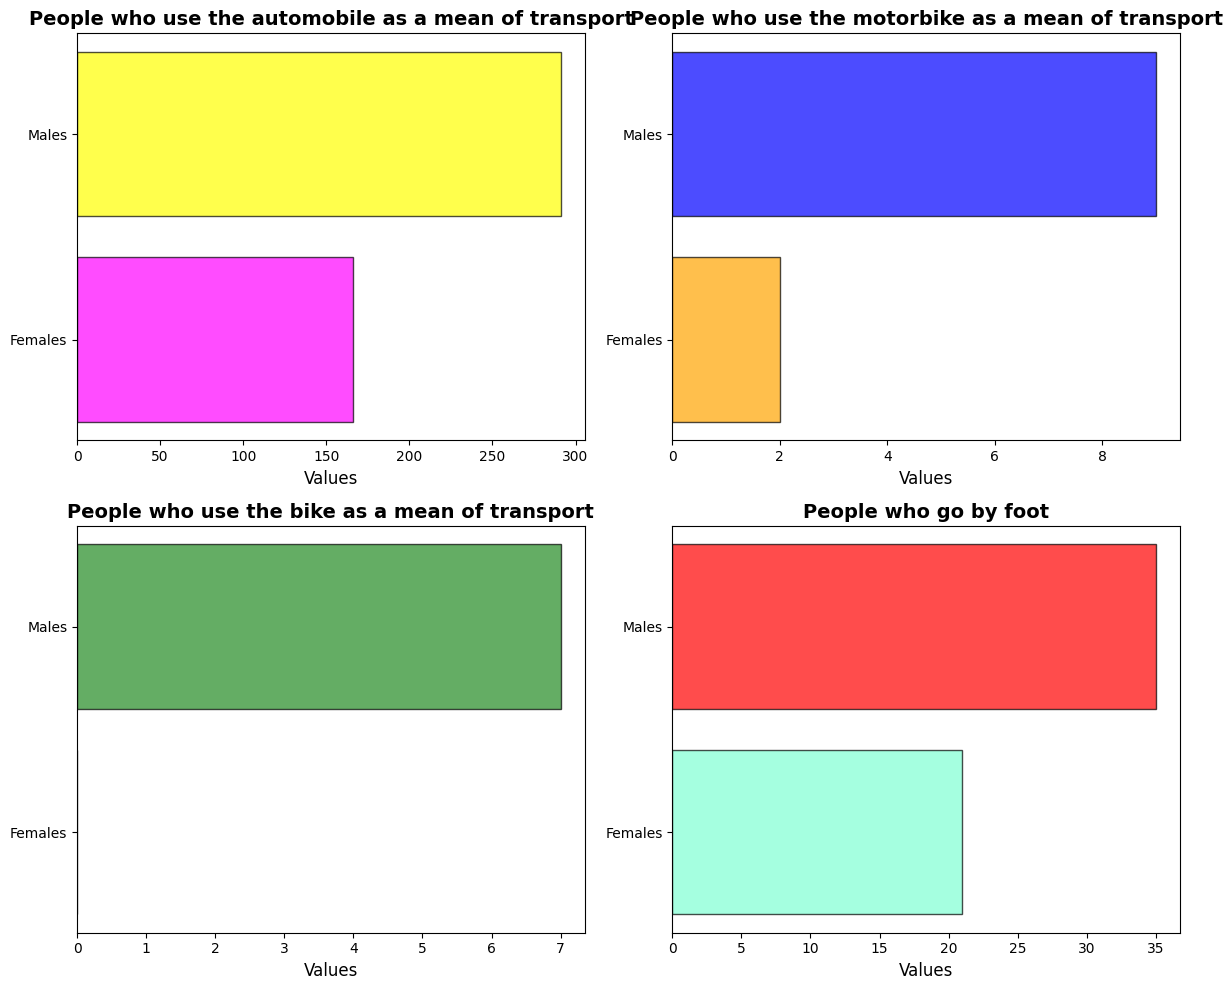

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].barh(y = (0, 1), width = (females_automobile.tolist(), males_automobile.tolist()), color = ('#FF00FF', '#FFFF00'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0, 0].set_title('People who use the automobile as a mean of transport', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0, 0].set_xlabel('Values', fontsize = 12)

axs[0, 1].barh(y = (0, 1), width = (females_motorbike.tolist(), males_motorbike.tolist()), color = ('#FFA500', '#0000FF'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[0, 1].set_title('People who use the motorbike as a mean of transport', fontsize = 14, fontweight = 'bold', color = 'black')
axs[0, 1].set_xlabel('Values', fontsize = 12)

axs[1, 0].barh(y = (0, 1), width = (females_bike.tolist(), males_bike.tolist()), color = ('#00FFFF', '#228B22'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1, 0].set_title('People who use the bike as a mean of transport', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1, 0].set_xlabel('Values', fontsize = 12)

axs[1, 1].barh(y = (0, 1), width = (females_walking.tolist(), males_walking.tolist()), color = ('#7FFFD4', '#FF0000'), edgecolor = 'black', linewidth = 1, alpha = 0.7, tick_label = ('Females', 'Males'))
axs[1, 1].set_title('People who go by foot', fontsize = 14, fontweight = 'bold', color = 'black')
axs[1, 1].set_xlabel('Values', fontsize = 12)

plt.tight_layout()
plt.show()

Let's now study the "NObeyesdad" column.

In [55]:
obesity_df1 = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_I'] 
obesity_df2 = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_II'] 
obesity_df3 = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_III']
obesity_df_OT = pd.concat([obesity_df1, obesity_df2, obesity_df3])

obesity_df4 = obesity_df[obesity_df['NObeyesdad'] == 'Overweight_Level_I'] 
obesity_df5 = obesity_df[obesity_df['NObeyesdad'] == 'Overweight_Level_II'] 
obesity_df_OW = pd.concat([obesity_df4, obesity_df5])

obesity_df6 = obesity_df[obesity_df['NObeyesdad'] == 'Insufficient_Weight'] 
obesity_df7 = obesity_df[obesity_df['NObeyesdad'] == 'Normal_Weight'] 
obesity_df_I_N = pd.concat([obesity_df6, obesity_df7])

In [40]:
obesity_df_OT

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
10,26.0,Male,1.8,105.0,Sometimes,yes,3.0,3.0,no,no,3.0,yes,2.0,2.0,Frequently,Public_Transportation,Obesity_Type_I
13,41.0,Male,1.8,99.0,Frequently,yes,2.0,3.0,no,no,2.0,no,2.0,1.0,Sometimes,Automobile,Obesity_Type_I
17,29.0,Female,1.5,78.0,no,yes,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Obesity_Type_I
21,52.0,Female,1.7,87.0,no,yes,3.0,1.0,no,yes,2.0,yes,0.0,0.0,Sometimes,Automobile,Obesity_Type_I
23,22.0,Female,1.6,82.0,Sometimes,yes,1.0,1.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.7,yes,1.7,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.3,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.1,yes,1.4,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.1,0.6,Sometimes,Public_Transportation,Obesity_Type_III


In [41]:
obesity_df_OW

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
3,27.0,Male,1.8,87.0,Frequently,no,3.000000,3.000000,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
19,23.0,Female,1.6,70.0,Sometimes,no,2.000000,1.000000,no,no,2.0,yes,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
30,29.0,Male,1.8,83.0,no,yes,1.000000,4.000000,no,no,3.0,no,0.0,1.0,Frequently,Motorbike,Overweight_Level_I
40,21.0,Female,1.7,75.0,Sometimes,yes,2.000000,3.000000,no,no,2.0,yes,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
65,21.0,Female,1.6,69.0,no,yes,1.000000,3.000000,no,no,2.0,yes,0.0,1.0,Frequently,Public_Transportation,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,35.4,Female,1.7,80.1,no,yes,2.000000,3.000000,no,no,2.0,yes,0.0,1.5,Sometimes,Automobile,Overweight_Level_II
1205,33.9,Female,1.7,77.4,no,yes,2.768020,2.137068,no,no,1.9,yes,1.0,0.7,Sometimes,Automobile,Overweight_Level_II
1206,23.8,Male,1.7,82.5,Sometimes,yes,2.742796,2.937607,no,no,2.0,yes,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
1207,39.6,Male,1.7,86.5,no,yes,2.325623,1.313403,no,no,1.9,yes,0.6,0.0,Sometimes,Automobile,Overweight_Level_II


In [42]:
obesity_df_I_N

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
59,20.0,Male,1.8,55.0,no,yes,2.0,4.0,no,no,3.0,yes,2.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
71,22.0,Female,1.7,50.0,Sometimes,no,3.0,3.0,yes,no,3.0,yes,2.0,1.0,no,Public_Transportation,Insufficient_Weight
75,23.0,Female,1.6,45.0,no,no,3.0,3.0,yes,no,3.0,yes,2.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
76,24.0,Female,1.6,45.0,no,no,2.0,3.0,no,no,2.0,yes,1.0,0.0,no,Public_Transportation,Insufficient_Weight
83,19.0,Female,1.6,45.0,no,no,3.0,3.0,yes,no,3.0,no,2.0,0.0,no,Walking,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,25.0,Male,1.7,68.0,Sometimes,yes,2.0,3.0,no,yes,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
493,20.0,Male,1.8,65.0,Sometimes,yes,2.0,3.0,no,no,1.0,no,2.0,0.0,Frequently,Motorbike,Normal_Weight
494,18.0,Female,1.7,66.0,Sometimes,yes,3.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal_Weight
495,19.0,Male,1.8,60.0,no,yes,3.0,1.0,yes,no,1.0,yes,0.0,0.0,Always,Motorbike,Normal_Weight


In [43]:
obesity_typeI = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_I']['NObeyesdad'].count()
print('Number of people who suffer from obesity type I:', obesity_typeI)

females_obesity_typeI = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Obesity_Type_I')]['NObeyesdad'].count()
print('Number of females who suffer from obesity type I:', females_obesity_typeI)

males_obesity_typeI = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Obesity_Type_I')]['NObeyesdad'].count()
print('Number of males who suffer from obesity type I:', males_obesity_typeI)

Number of people who suffer from obesity type I: 351
Number of females who suffer from obesity type I: 156
Number of males who suffer from obesity type I: 195


In [44]:
obesity_typeII = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_II']['NObeyesdad'].count()
print('Number of people who suffer from obesity type II:', obesity_typeII)

females_obesity_typeII = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Obesity_Type_II')]['NObeyesdad'].count()
print('Number of females who suffer from obesity type II:', females_obesity_typeII)

males_obesity_typeII = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Obesity_Type_II')]['NObeyesdad'].count()
print('Number of males who suffer from obesity type II:', males_obesity_typeII)

Number of people who suffer from obesity type II: 297
Number of females who suffer from obesity type II: 2
Number of males who suffer from obesity type II: 295


In [45]:
obesity_typeIII = obesity_df[obesity_df['NObeyesdad'] == 'Obesity_Type_III']['NObeyesdad'].count()
print('Number of people who suffer from obesity type III:', obesity_typeIII)

females_obesity_typeIII = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Obesity_Type_III')]['NObeyesdad'].count()
print('Number of females who suffer from obesity type III:', females_obesity_typeIII)

males_obesity_typeIII = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Obesity_Type_III')]['NObeyesdad'].count()
print('Number of males who suffer from obesity type III:', males_obesity_typeIII)

Number of people who suffer from obesity type III: 324
Number of females who suffer from obesity type III: 323
Number of males who suffer from obesity type III: 1


In [46]:
overweight_typeI = obesity_df[obesity_df['NObeyesdad'] == 'Overweight_Level_I']['NObeyesdad'].count()
print('Number of people who suffer from overweight level I:', overweight_typeI)

females_overweight_levelI = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Overweight_Level_I')]['NObeyesdad'].count()
print('Number of females who suffer from overweight level I:', females_overweight_levelI)

males_overweight_levelI = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Overweight_Level_I')]['NObeyesdad'].count()
print('Number of males who suffer from overweight level I:', males_overweight_levelI)

Number of people who suffer from overweight level I: 290
Number of females who suffer from overweight level I: 145
Number of males who suffer from overweight level I: 145


In [47]:
overweight_typeII = obesity_df[obesity_df['NObeyesdad'] == 'Overweight_Level_II']['NObeyesdad'].count()
print('Number of people who suffer from overweight level II:', overweight_typeII)

females_overweight_levelII = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Overweight_Level_II')]['NObeyesdad'].count()
print('Number of females who suffer from overweight level II:', females_overweight_levelII)

males_overweight_levelII = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Overweight_Level_II')]['NObeyesdad'].count()
print('Number of males who suffer from overweight level II:', males_overweight_levelII)

Number of people who suffer from overweight level II: 290
Number of females who suffer from overweight level II: 103
Number of males who suffer from overweight level II: 187


In [48]:
insufficient_weight = obesity_df[obesity_df['NObeyesdad'] == 'Insufficient_Weight']['NObeyesdad'].count()
print('Number of people who suffer from insufficient weight:', insufficient_weight)

females_insufficient_weight = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Insufficient_Weight')]['NObeyesdad'].count()
print('Number of females who suffer from insufficient weight:', females_insufficient_weight)

males_insufficient_weight = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Insufficient_Weight')]['NObeyesdad'].count()
print('Number of males who suffer from insufficient weight:', males_insufficient_weight)

Number of people who suffer from insufficient weight: 272
Number of females who suffer from insufficient weight: 173
Number of males who suffer from insufficient weight: 99


In [49]:
normal_weight = obesity_df[obesity_df['NObeyesdad'] == 'Normal_Weight']['NObeyesdad'].count()
print('Number of people who are normal weight:', normal_weight)

females_normal_weight = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['NObeyesdad'] == 'Normal_Weight')]['NObeyesdad'].count()
print('Number of females who are normal weight:', females_normal_weight)

males_normal_weight = obesity_df[(obesity_df['Gender'] == 'Male') & (obesity_df['NObeyesdad'] == 'Normal_Weight')]['NObeyesdad'].count()
print('Number of males who are normal weight:', males_normal_weight)

Number of people who are normal weight: 287
Number of females who are normal weight: 141
Number of males who are normal weight: 146


/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1985/4125484207.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data = data, x = 'Gender', hue = 'NObeyesdad', palette = fluorescent_palette, ax = axes[i], multiple = 'stack')
/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1985/4125484207.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data = data, x = 'Gender', hue = 'NObeyesdad', palette = fluorescent_palette, ax = axes[i], multiple = 'stack')
/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1985/4125484207.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data = data, x = 'Gender', hue = 'NObeyesdad', palette = fluorescent_palette, ax = axes[i], multiple = 'stack')


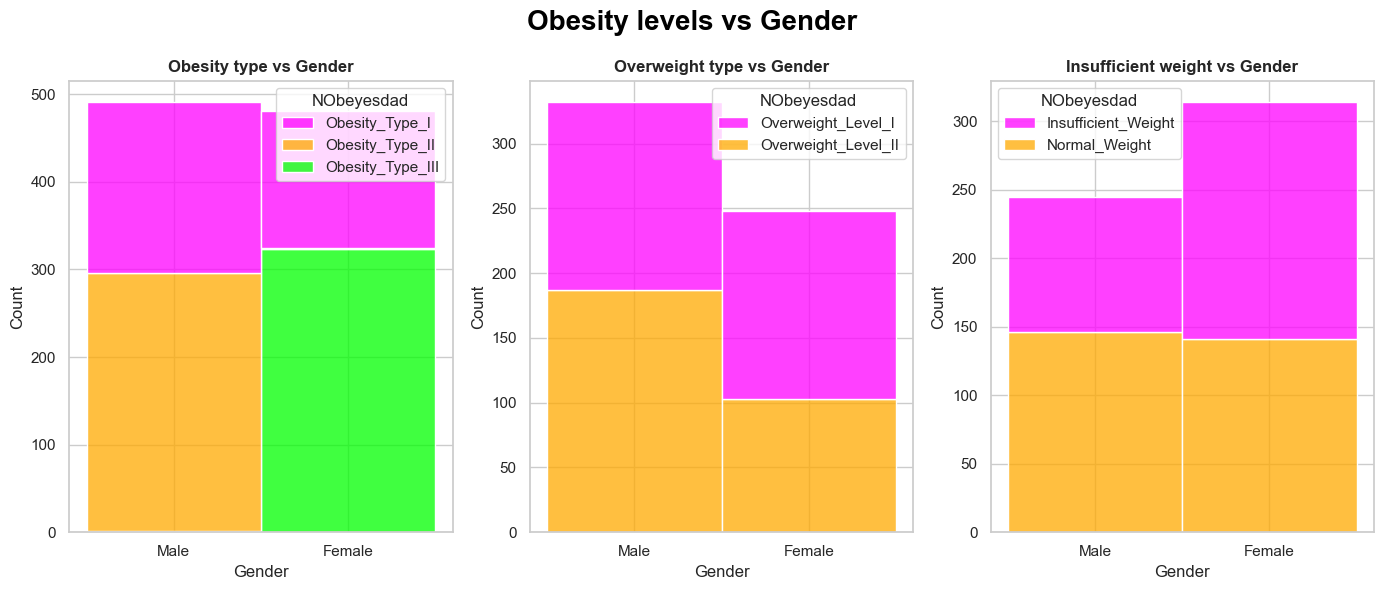

In [50]:
data_list = [obesity_df_OT, obesity_df_OW, obesity_df_I_N]
data_name = ["Obesity type", "Overweight type", "Insufficient weight"]
fluorescent_palette = ['#ff00ff', '#ffaa00', '#00ff00', '#00ffff', '#ff00ff', '#ffff00', '#00ff00', '#ff0000', '#ff0088', '#00ff00']

sns.set_theme(style = "whitegrid")
fig, axes = plt.subplots(figsize = (14, 6), ncols = len(data_list))

for i, data in enumerate(data_list):
    sns.histplot(data = data, x = 'Gender', hue = 'NObeyesdad', palette = fluorescent_palette, ax = axes[i], multiple = 'stack')
    axes[i].set_title(f'{data_name[i]} vs Gender', fontweight = 'bold')

fig.suptitle('Obesity levels vs Gender', fontsize = 20, fontweight = 'bold', color = 'black')

plt.tight_layout()
plt.show()

The alarming finding from these graphs is the number of females suffering from obesity type III, which is for example, a female 1.70 cm high, weighing about 120 kg. 

Now let's see if there are some interesting correlations between the features and show the relative correlation matrix.

In [51]:
obesity_df_corr = obesity_df.corr(numeric_only = True)
obesity_df_corr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,0.000823,0.202539,0.016270,-0.043963,-0.045169,-0.144118,-0.297073
Height,0.000823,1.000000,0.432015,-0.073961,0.237201,0.201753,0.283489,0.058563
Weight,0.202539,0.432015,1.000000,0.216121,0.107462,0.200409,-0.050878,-0.072543
FCVC,0.016270,-0.073961,0.216121,1.000000,0.042216,0.068049,0.020470,-0.099556
NCP,-0.043963,0.237201,0.107462,0.042216,1.000000,0.056961,0.128807,0.035379
CH2O,-0.045169,0.201753,0.200409,0.068049,0.056961,1.000000,0.167358,0.013010
FAF,-0.144118,0.283489,-0.050878,0.020470,0.128807,0.167358,1.000000,0.057168
TUE,-0.297073,0.058563,-0.072543,-0.099556,0.035379,0.013010,0.057168,1.000000


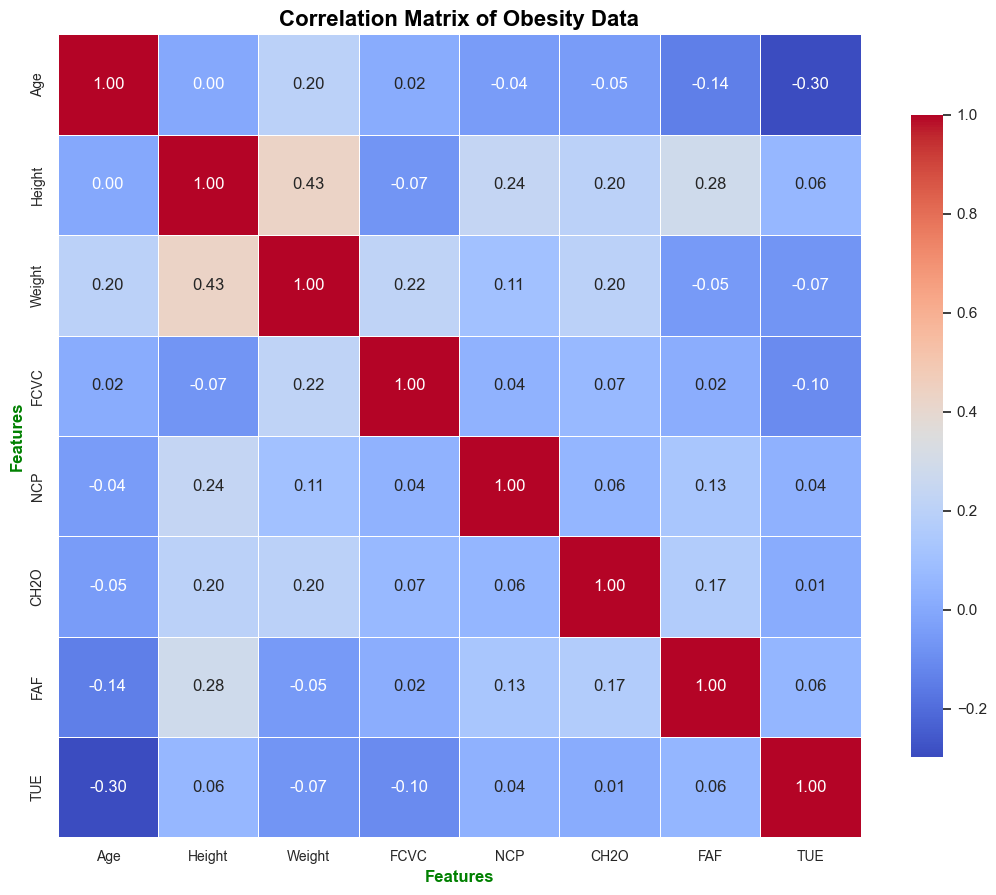

In [52]:
plt.figure(figsize = (11, 9))
sns.heatmap(obesity_df_corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, square = True, cbar_kws = {"shrink": 0.8})
plt.title('Correlation Matrix of Obesity Data', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.ylabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.tight_layout()
plt.show()

Below, it has been added the *pd.get_dummies* function that is used to convert categorical variables to indicator variables. 

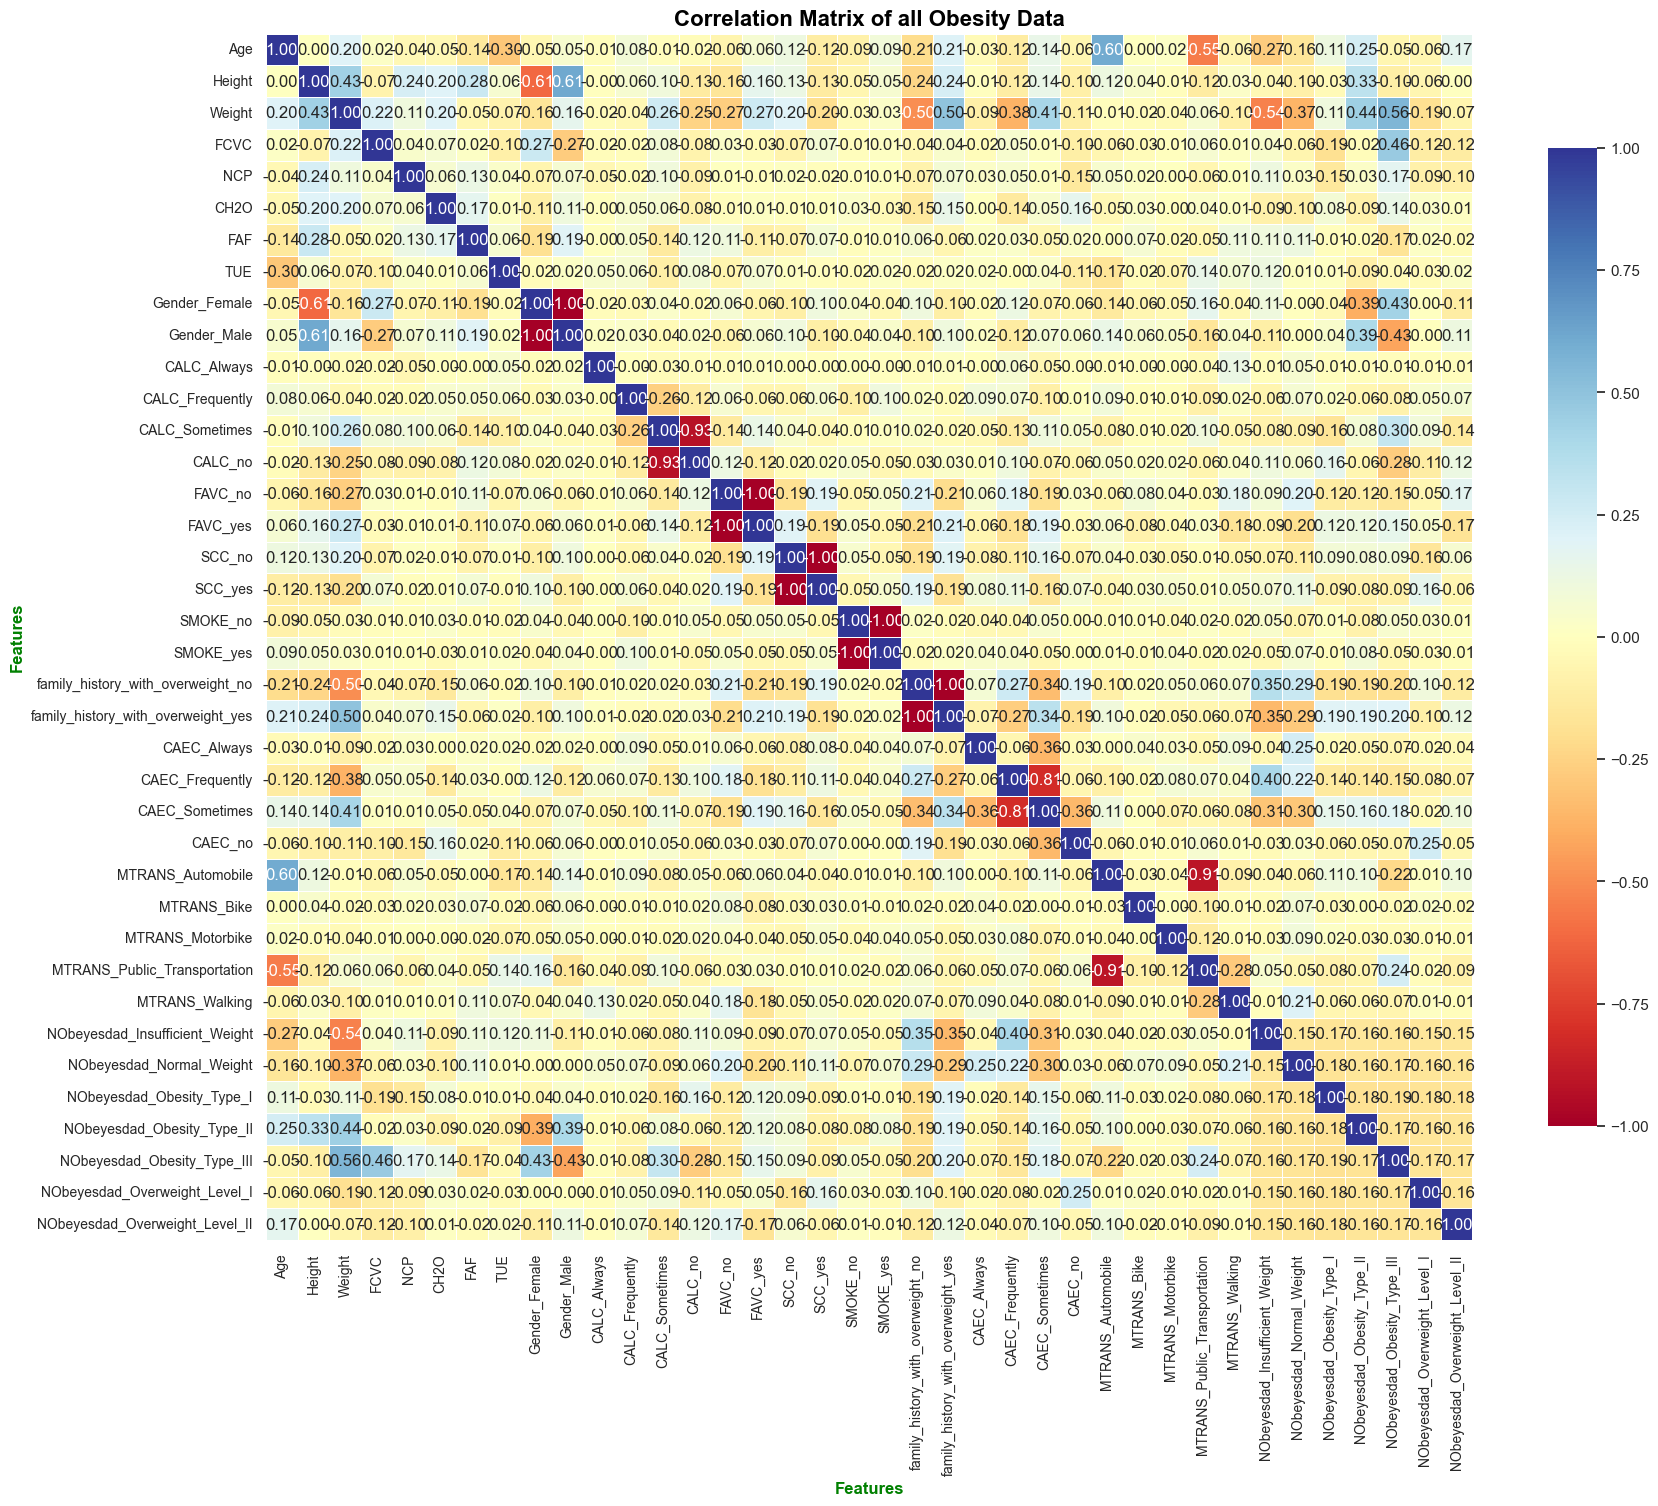

In [53]:
obesity_df_dummies = pd.get_dummies(obesity_df)
correlation_matrix = obesity_df_dummies.corr()

plt.figure(figsize = (18, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdYlBu', fmt = ".2f", linewidths = 0.5, square = True, cbar_kws = {"shrink": 0.8})
plt.title('Correlation Matrix of all Obesity Data', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.ylabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.tight_layout()
plt.show()

As it can be seen, a heat map is a visual representation of data in the form of a two-dimensional matrix where values are depicted using colors. This tool is used to examine the relationship between two sets of data, highlighting patterns, trends, and correlations through color usage. The cells of the matrix are colored based on the values they represent, with lighter colors indicating lower values and darker colors indicating higher values. In summary, a heat map is a useful visualization for analyzing and interpreting data in a clear and intuitive manner which is an essential skill of a data scientist.

In particular, correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables. The Pearson correlation coefficient, denoted as "r", ranges from -1 to 1, where:
- r close to 1 indicates a strong positive correlation
- r close to -1 indicates a strong negative correlation
- r close to 0 indicates a weak or absent correlation

Taking the highest correlation value is important because it indicates a stronger relationship between variables, suggesting that they vary together more consistently. 

Looking at the heat map, it can be considered the "Weight" column with the "NObeyesdad" feature, by the way, just studied. Of particular note is the fairly high positive correlation of weight with "NObeyesdad_Obesity_Type_III" and "Weight" and the negative correlation between "Weight" and "NObeyesdad_Insufficient_Weight".

In [57]:
print("The correlation between obesity type III and weight is:", (obesity_df['NObeyesdad'] == 'Obesity_Type_III').corr(obesity_df['Weight']))

The correlation between obesity type III and weight is: 0.5586670564218778


In [58]:
print("The correlation between insufficient weight and weight is:", (obesity_df['NObeyesdad'] == 'Insufficient_Weight').corr(obesity_df['Weight']))

The correlation between insufficient weight and weight is: -0.5387150018672469


The result of the correlation between A and B is the same as the correlation between B and A. This means that the correlation coefficient between A and B is equal to the correlation coefficient between B and A. This principle is known as the symmetry property of correlation. So calculating the correlation value by swapping the subjects is pointless.